In [1]:
import pandas as pd
import datetime
import os
from fpdf import FPDF
import matplotlib.pyplot as plt
from matplotlib import font_manager
import seaborn as sns
import matplotlib.dates as mdates

# Set pandas to display 36 rows
pd.set_option('display.max_rows', 36)

In [2]:
# Importing Data
raw_data_folder = "../data/raw/"

# Initialize the objects for the different datasets
brazilFuels_prices = None
BrStatesFuels_prices = None
BrFuels_imports = None
BrFuels_sales = None

# Loop through all the files in the folder
for file_name in os.listdir(raw_data_folder):
    file_path = os.path.join(raw_data_folder, file_name)
    
    # Check if the file is an Excel file with "mensal-brasil" in the name
    if "mensal-brasil" in file_name and file_name.endswith(".xlsx"):
        brazilFuels_prices = pd.read_excel(file_path, skiprows=16)
        print(f"Loaded Brazil Fuels Prices: {file_name}")
    
    # Check if the file is an Excel file with "mensal-estados" in the name
    elif "mensal-estados" in file_name and file_name.endswith(".xlsx"):
        BrStatesFuels_prices = pd.read_excel(file_path, skiprows=16)
        print(f"Loaded Brazil States Fuels Prices: {file_name}")
    
    # Check if the file is an Excel file with "tradeflows" in the name
    elif "tradeflows" in file_name and file_name.endswith(".xls"):
        BrFuels_imports = pd.read_excel(file_path)
        print(f"Loaded Brazil Fuels Imports: {file_name}")
    
    # Check if the file is a CSV file with "vendas-combustiveis" in the name
    elif "vendas-combustiveis" in file_name and file_name.endswith(".csv"):
        BrFuels_sales = pd.read_csv(file_path)
        print(f"Loaded Brazil Fuels Sales: {file_name}")

Loaded Brazil Fuels Prices: mensal-brasil-desde-jan2013.xlsx
Loaded Brazil Fuels Imports: tradeflows-2024-10-19.xls
Loaded Brazil Fuels Sales: vendas-combustiveis-m3-1990-2024.csv
Loaded Brazil States Fuels Prices: mensal-estados-desde-jan2013.xlsx


In [3]:
def prepare_df(df_data):
    # Manipulating Data
    df = df_data
    df.rename(columns={"MÊS":"Date"}, inplace= True)
    df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

    df.iloc[:,6:16] = df.iloc[:, 6:16].apply(pd.to_numeric, errors = "coerce")
    df.iloc[:,6:16] = df.iloc[:, 6:16].round(2)

    # Extract month and year from 'Date' column
    df["MONTH"] = df["Date"].dt.month
    df["YEAR"] = df["Date"].dt.year
    
    return df

def prepare_first_table(df):
    # Preparing the Table
    
    df[(df["YEAR"] >= 2024) & (df["MONTH"] >= 9)]
    
    # Define the custom order for the "REGIÃO" (rows)
    region_order = ["NORTE", "NORDESTE", "CENTRO OESTE", "SUDESTE", "SUL"]  # Customize the order as needed

    # Define the custom order for the "PRODUTO" (columns)
    product_order = ["GASOLINA COMUM", "GASOLINA ADITIVADA", "OLEO DIESEL", "OLEO DIESEL S10", "ETANOL HIDRATADO", "GLP", "GNV"]  # Customize the order as needed

    # Set the 'REGIÃO' and 'PRODUTO' as categorical data with specific order
    df["REGIÃO"] = pd.Categorical(df["REGIÃO"], categories=region_order, ordered=True)
    df["PRODUTO"] = pd.Categorical(df["PRODUTO"], categories=product_order, ordered=True)

    # Pivot Table
    pivot_df = df.pivot_table(index="REGIÃO", columns="PRODUTO", values="PREÇO MÉDIO REVENDA", aggfunc="mean")


    # Editing column names
    products_name =  {
        "GASOLINA COMUM": "Gas. Comum (R$/lt)",
        "GASOLINA ADITIVADA": "Gas. Aditivada (R$/lt)",
        "OLEO DIESEL": "Ó. Diesel (R$/lt)",
        "OLEO DIESEL S10": "Ó. Diesel S10 (R$/lt)",
        "ETANOL HIDRATADO": "E. Hidratado (R$/lt)",
        "GLP": "GLP (R$/13kg)",
        "GNV": "GNV (R$/m³)"
    }

    # Editing column names
    regions_name = {
        "NORTE": "Norte",
        "NORDESTE": "Nordeste",
        "CENTRO OESTE": "C. Oeste",
        "SUDESTE": "Sudeste",
        "SUL": "Sul"
    }

    # Rename the columns and the index
    pivot_df = pivot_df.rename(columns=products_name, index=regions_name)
    pivot_df.iloc[:,0:8] = pivot_df.iloc[:,0:8].round(2)

    # Transpose the pivot table
    transposed_pivot_df = pivot_df.T
    
    return transposed_pivot_df

df_priceTable = prepare_df(BrStatesFuels_prices)
df_priceTable = prepare_first_table(df_priceTable)
BrStatesFuels_prices

,Date,PRODUTO,REGIÃO,ESTADO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MONTH,YEAR
0,2013-01-01,ETANOL HIDRATADO,NORTE,ACRE,166,R$/l,2.55,0.13,2.35,3.12,0.367,0.05,2.185,0.126,1.6239,2.4745,0.058,1,2013
1,2013-01-01,ETANOL HIDRATADO,NORDESTE,ALAGOAS,460,R$/l,2.30,0.07,2.15,2.60,0.256,0.03,2.047,0.081,1.7071,2.2281,0.04,1,2013
2,2013-01-01,ETANOL HIDRATADO,NORTE,AMAPA,38,R$/l,2.26,0.05,2.15,2.32,0.285,0.02,1.973,0.0,1.973,1.973,0,1,2013
3,2013-01-01,ETANOL HIDRATADO,NORTE,AMAZONAS,376,R$/l,2.32,0.09,2.22,2.95,0.198,0.04,2.121,0.046,1.9941,2.2269,0.022,1,2013
4,2013-01-01,ETANOL HIDRATADO,NORDESTE,BAHIA,2029,R$/l,2.19,0.12,1.84,2.64,0.282,0.06,1.905,0.113,1.5258,2.4236,0.059,1,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22651,2024-09-01,OLEO DIESEL S10,NORTE,RORAIMA,75,R$/l,6.43,0.04,6.37,6.51,NaN,0.01,NaN,NaN,NaN,NaN,-,9,2024
22652,2024-09-01,OLEO DIESEL S10,SUL,SANTA CATARINA,466,R$/l,5.99,0.24,5.59,6.86,NaN,0.04,NaN,NaN,NaN,NaN,-,9,2024
22653,2024-09-01,OLEO DIESEL S10,SUDESTE,SAO PAULO,3557,R$/l,6.02,0.38,5.33,8.99,NaN,0.06,NaN,NaN,NaN,NaN,-,9,2024
22654,2024-09-01,OLEO DIESEL S10,NORDESTE,SERGIPE,84,R$/l,5.86,0.22,5.69,6.38,NaN,0.04,NaN,NaN,NaN,NaN,-,9,2024


/var/folders/ym/3qhchx8d19q8jp5fvb95q9vw0000gn/T/ipykernel_28898/1172089004.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fuels_YoYCh = fuels_YoYCh.groupby(['YEAR', 'MONTH', 'REGIÃO'])['PREÇO MÉDIO REVENDA'].mean().reset_index()
/var/folders/ym/3qhchx8d19q8jp5fvb95q9vw0000gn/T/ipykernel_28898/1172089004.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fuels_YoYCh = fuels_YoYCh.groupby(['YEAR', 'MONTH', 'REGIÃO'])['PREÇO MÉDIO REVENDA'].mean().reset_index()
/var/folders/ym/3qhchx8d19q8jp5fvb95q9vw0000gn/T/ipykernel_28898/1172089004.py:13: FutureWarning: The default of observed=False is deprecated an

Chart saved as ../report/charts/etanol_hidratado_first_page.png


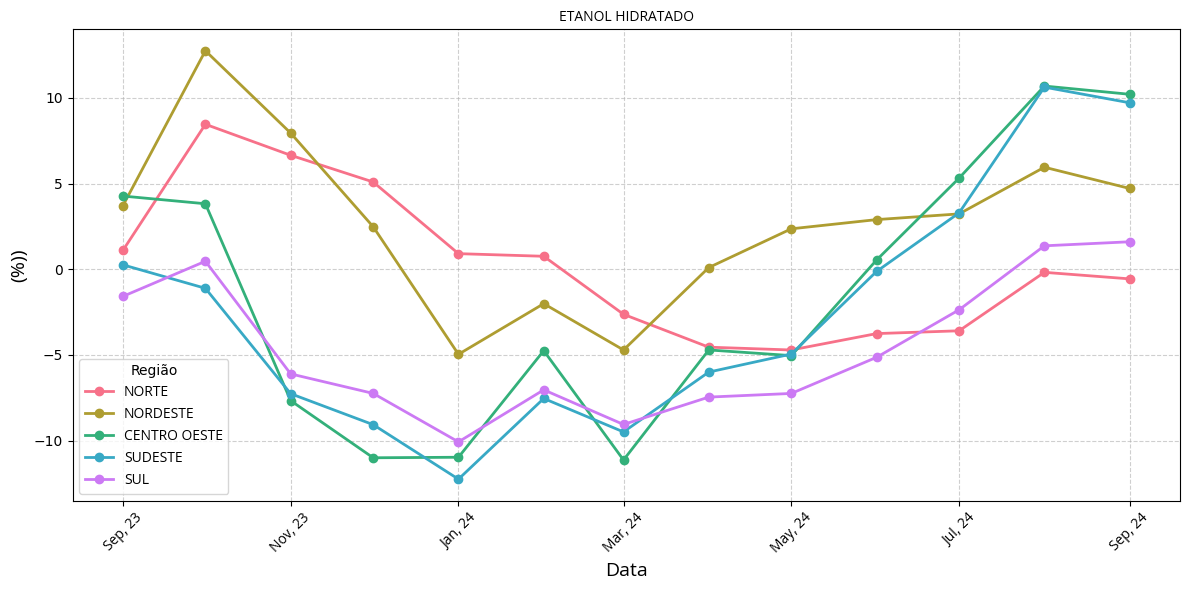

/var/folders/ym/3qhchx8d19q8jp5fvb95q9vw0000gn/T/ipykernel_28898/1172089004.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fuels_YoYCh = fuels_YoYCh.groupby(['YEAR', 'MONTH', 'REGIÃO'])['PREÇO MÉDIO REVENDA'].mean().reset_index()
/var/folders/ym/3qhchx8d19q8jp5fvb95q9vw0000gn/T/ipykernel_28898/1172089004.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fuels_YoYCh = fuels_YoYCh.groupby(['YEAR', 'MONTH', 'REGIÃO'])['PREÇO MÉDIO REVENDA'].mean().reset_index()
/var/folders/ym/3qhchx8d19q8jp5fvb95q9vw0000gn/T/ipykernel_28898/1172089004.py:13: FutureWarning: The default of observed=False is deprecated an

Chart saved as ../report/charts/gasolina_comum_first_page.png


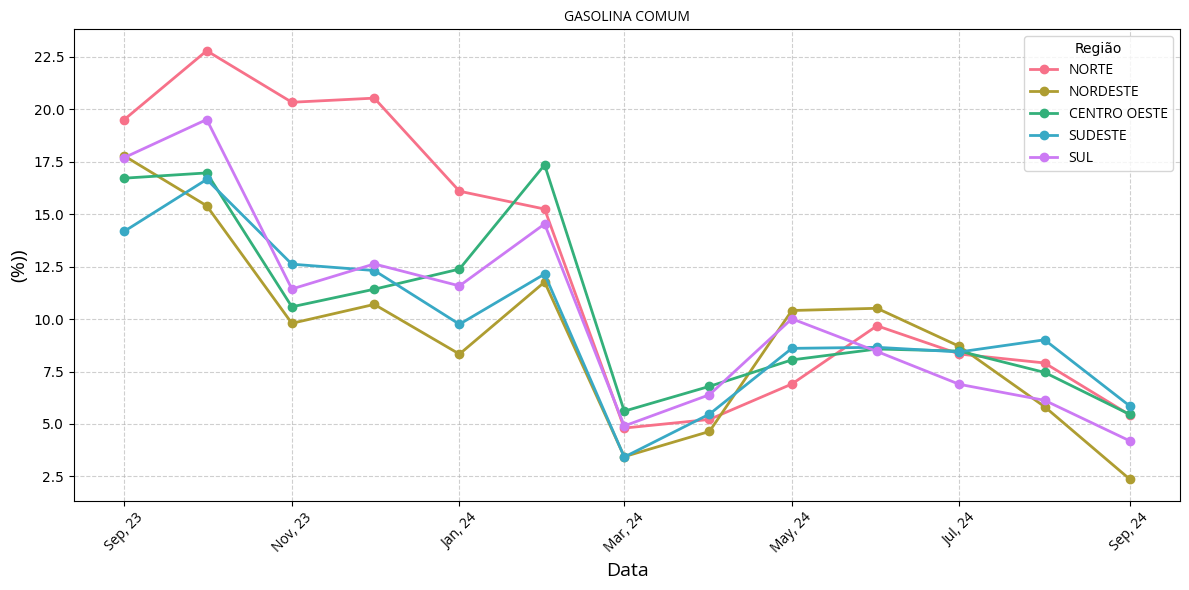

/var/folders/ym/3qhchx8d19q8jp5fvb95q9vw0000gn/T/ipykernel_28898/1172089004.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fuels_YoYCh = fuels_YoYCh.groupby(['YEAR', 'MONTH', 'REGIÃO'])['PREÇO MÉDIO REVENDA'].mean().reset_index()
/var/folders/ym/3qhchx8d19q8jp5fvb95q9vw0000gn/T/ipykernel_28898/1172089004.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fuels_YoYCh = fuels_YoYCh.groupby(['YEAR', 'MONTH', 'REGIÃO'])['PREÇO MÉDIO REVENDA'].mean().reset_index()
/var/folders/ym/3qhchx8d19q8jp5fvb95q9vw0000gn/T/ipykernel_28898/1172089004.py:13: FutureWarning: The default of observed=False is deprecated an

Chart saved as ../report/charts/glp_first_page.png


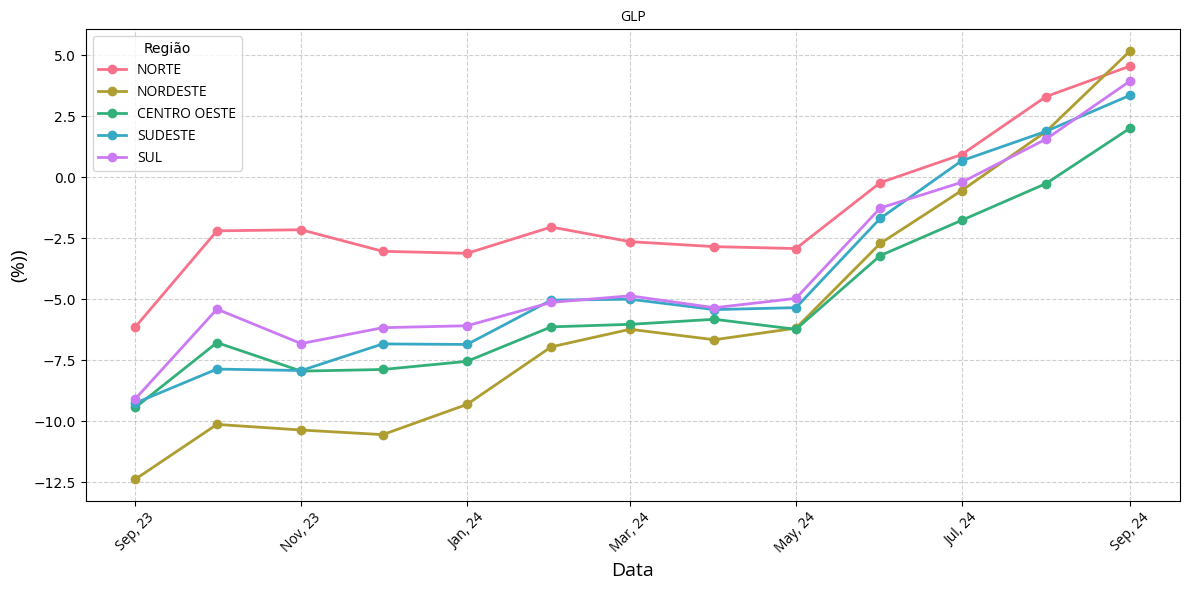

/var/folders/ym/3qhchx8d19q8jp5fvb95q9vw0000gn/T/ipykernel_28898/1172089004.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fuels_YoYCh = fuels_YoYCh.groupby(['YEAR', 'MONTH', 'REGIÃO'])['PREÇO MÉDIO REVENDA'].mean().reset_index()
/var/folders/ym/3qhchx8d19q8jp5fvb95q9vw0000gn/T/ipykernel_28898/1172089004.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fuels_YoYCh = fuels_YoYCh.groupby(['YEAR', 'MONTH', 'REGIÃO'])['PREÇO MÉDIO REVENDA'].mean().reset_index()
/var/folders/ym/3qhchx8d19q8jp5fvb95q9vw0000gn/T/ipykernel_28898/1172089004.py:13: FutureWarning: The default of observed=False is deprecated an

Chart saved as ../report/charts/gnv_first_page.png


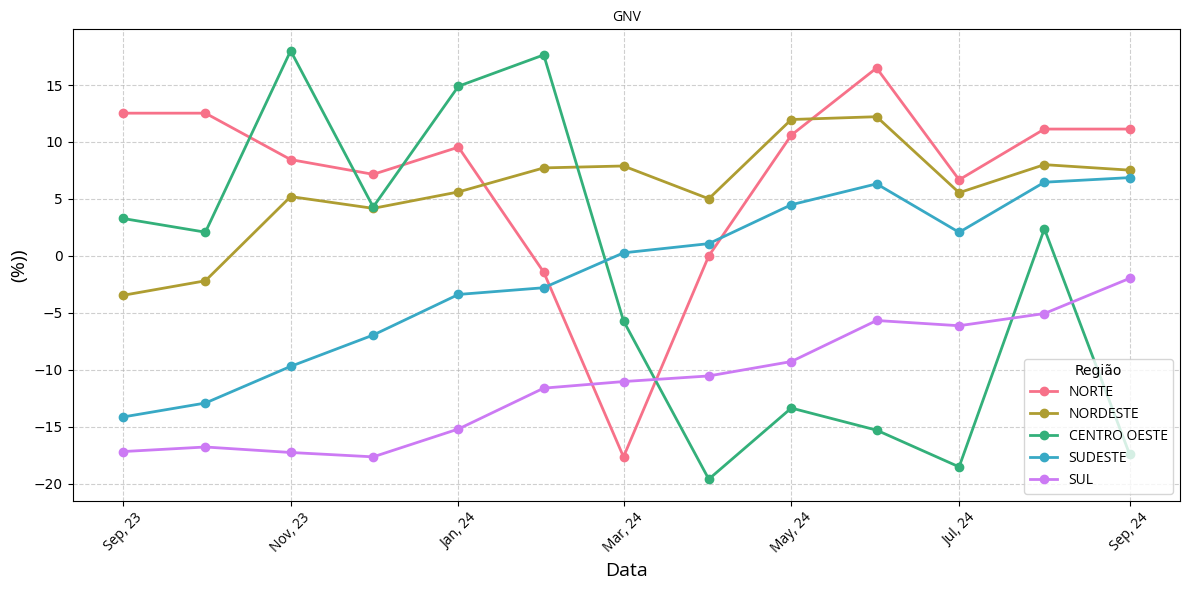

/var/folders/ym/3qhchx8d19q8jp5fvb95q9vw0000gn/T/ipykernel_28898/1172089004.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fuels_YoYCh = fuels_YoYCh.groupby(['YEAR', 'MONTH', 'REGIÃO'])['PREÇO MÉDIO REVENDA'].mean().reset_index()
/var/folders/ym/3qhchx8d19q8jp5fvb95q9vw0000gn/T/ipykernel_28898/1172089004.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fuels_YoYCh = fuels_YoYCh.groupby(['YEAR', 'MONTH', 'REGIÃO'])['PREÇO MÉDIO REVENDA'].mean().reset_index()
/var/folders/ym/3qhchx8d19q8jp5fvb95q9vw0000gn/T/ipykernel_28898/1172089004.py:13: FutureWarning: The default of observed=False is deprecated an

Chart saved as ../report/charts/oleo_diesel_first_page.png


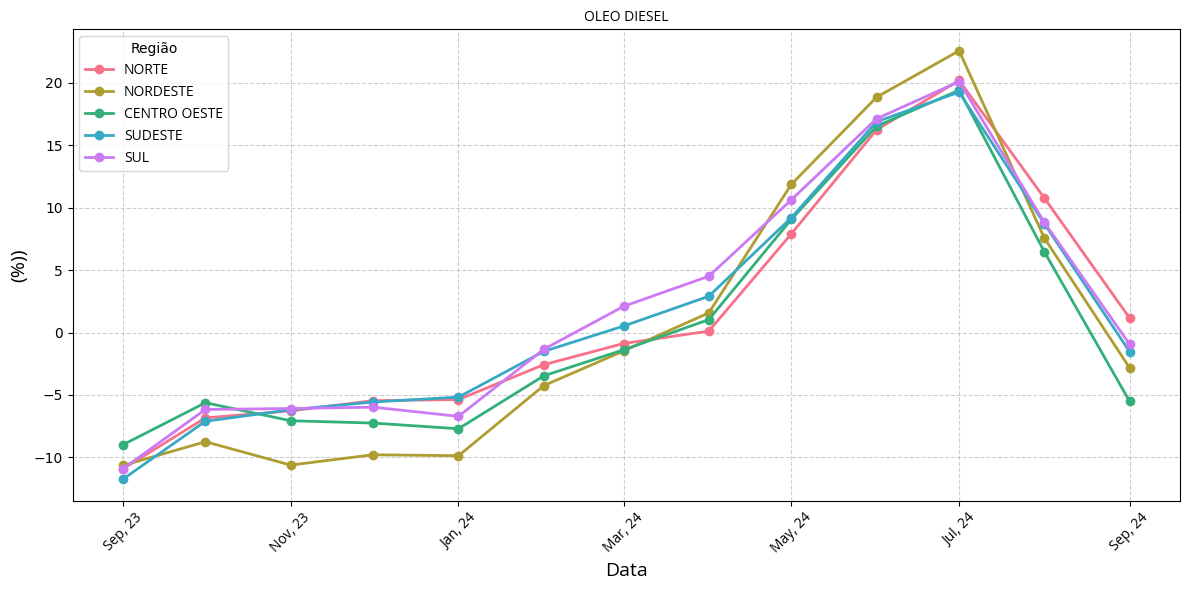

/var/folders/ym/3qhchx8d19q8jp5fvb95q9vw0000gn/T/ipykernel_28898/1172089004.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fuels_YoYCh = fuels_YoYCh.groupby(['YEAR', 'MONTH', 'REGIÃO'])['PREÇO MÉDIO REVENDA'].mean().reset_index()
/var/folders/ym/3qhchx8d19q8jp5fvb95q9vw0000gn/T/ipykernel_28898/1172089004.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fuels_YoYCh = fuels_YoYCh.groupby(['YEAR', 'MONTH', 'REGIÃO'])['PREÇO MÉDIO REVENDA'].mean().reset_index()
/var/folders/ym/3qhchx8d19q8jp5fvb95q9vw0000gn/T/ipykernel_28898/1172089004.py:13: FutureWarning: The default of observed=False is deprecated an

Chart saved as ../report/charts/oleo_diesel_s10_first_page.png


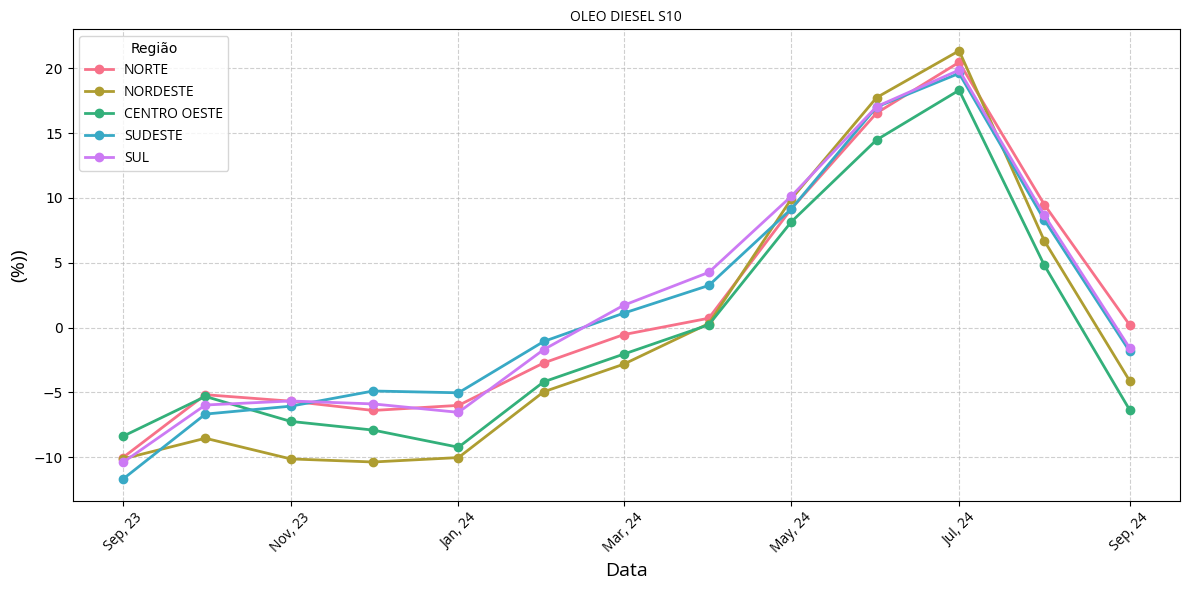

/var/folders/ym/3qhchx8d19q8jp5fvb95q9vw0000gn/T/ipykernel_28898/1172089004.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fuels_YoYCh = fuels_YoYCh.groupby(['YEAR', 'MONTH', 'REGIÃO'])['PREÇO MÉDIO REVENDA'].mean().reset_index()
/var/folders/ym/3qhchx8d19q8jp5fvb95q9vw0000gn/T/ipykernel_28898/1172089004.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fuels_YoYCh = fuels_YoYCh.groupby(['YEAR', 'MONTH', 'REGIÃO'])['PREÇO MÉDIO REVENDA'].mean().reset_index()
/var/folders/ym/3qhchx8d19q8jp5fvb95q9vw0000gn/T/ipykernel_28898/1172089004.py:13: FutureWarning: The default of observed=False is deprecated an

Chart saved as ../report/charts/gasolina_aditivada_first_page.png


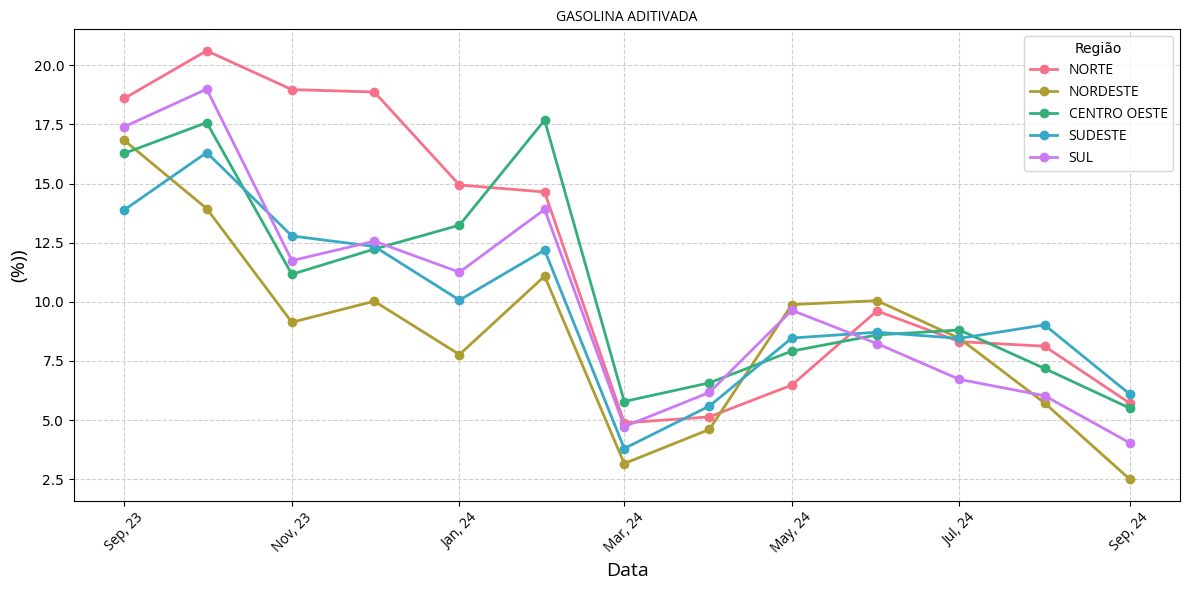

In [4]:
def calculate_yoy_variation(BrStatesFuels_prices, selected_product, regions):
    # Initialize an empty DataFrame to store the results
    all_results = pd.DataFrame()
    
    # Loop through each product in the provided list
    for region in regions:
        # Filter the DataFrame for the selected region and product
        fuels_YoYCh = BrStatesFuels_prices[["MONTH", "YEAR", "REGIÃO", "PRODUTO", "PREÇO MÉDIO REVENDA"]]
        fuels_YoYCh = fuels_YoYCh[fuels_YoYCh["PRODUTO"] == selected_product]
        fuels_YoYCh = fuels_YoYCh[fuels_YoYCh["REGIÃO"] == region]
        
        # Group by year and month, calculating the mean price
        fuels_YoYCh = fuels_YoYCh.groupby(['YEAR', 'MONTH', 'REGIÃO'])['PREÇO MÉDIO REVENDA'].mean().reset_index()

        # Sort the DataFrame by year and month
        fuels_YoYCh = fuels_YoYCh.sort_values(by=["YEAR", "MONTH"], ascending=True)

        # Drop any NaN values
        fuels_YoYCh = fuels_YoYCh.dropna()
        
        # Calculate Year-over-Year variation
        fuels_YoYCh['PREÇO MÉDIO REVENDA ANO ANTERIOR'] = fuels_YoYCh['PREÇO MÉDIO REVENDA'].shift(12)
        fuels_YoYCh['YoY Variation %'] = ((fuels_YoYCh['PREÇO MÉDIO REVENDA'] - fuels_YoYCh['PREÇO MÉDIO REVENDA ANO ANTERIOR']) / 
                                           fuels_YoYCh['PREÇO MÉDIO REVENDA ANO ANTERIOR']) * 100
        
        # Sort by year and month in descending order
        fuels_YoYCh = fuels_YoYCh.sort_values(by=["YEAR", "MONTH"], ascending=False)
        
        # Select relevant columns
        fuels_YoYCh = fuels_YoYCh[["YEAR", "MONTH", "REGIÃO", "YoY Variation %"]]
        
        # Append the results to the all_results DataFrame
        all_results = pd.concat([all_results, fuels_YoYCh], ignore_index=True)
    
    # Create a date column by combining YEAR and MONTH
    all_results['DATE'] = pd.to_datetime(all_results[['YEAR', 'MONTH']].assign(DAY=1))
    all_results = all_results.drop(columns=['YEAR', 'MONTH'])
    all_results = all_results.pivot_table(index=["DATE"], columns="REGIÃO", values="YoY Variation %", aggfunc="mean")
    all_results = all_results.sort_values(by="DATE", ascending=False)
    
    # Path to your local font file
    font_path = './static/fonts/Open_Sans/static/OpenSans-Regular.ttf'  # Update this with your local path to the font
    font_prop = font_manager.FontProperties(fname=font_path)
    
    # Define the end date (latest date in the DataFrame)
    end_date = all_results.index.max()  # Get the maximum date from the index

    # Create a threshold for the past 12 months
    start_date = end_date - pd.DateOffset(months=12)  # Adjust this if your data frequency is monthly

    # Filter the DataFrame to include only the last 12 months
    chart_df = all_results[all_results.index >= start_date]
    
    # Create a color palette
    palette = sns.color_palette("husl", len(chart_df.columns))  # You can choose different palettes like "viridis", "pastel", etc.

    # Plot the line chart
    plt.figure(figsize=(12, 6))
    for idx, region in enumerate(chart_df.columns):
        plt.plot(chart_df.index, chart_df[region], marker='o', label=region, color=palette[idx], linewidth=2)

    # Add titles and labels
    plt.title(f'{selected_product}', fontsize=18, fontproperties=font_prop, weight='bold')
    plt.xlabel('Data', fontsize=14, fontproperties=font_prop)
    plt.ylabel('(%))', fontsize=14, fontproperties=font_prop)

    # Customize x-axis date format
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b, %y'))  # Format as 'Sep, 23'
    plt.xticks(rotation=45, fontproperties=font_prop)

    plt.legend(title='Região', prop=font_prop, fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    
    # Save the plot as an image file
    image_filename = f'{selected_product.replace(" ", "_").lower()}_first_page.png'  # Replace spaces with underscores and make lowercase
    export_folder = "../report/charts/"
    full_path = os.path.join(export_folder, image_filename)  # Combine folder path and filename
    plt.savefig(full_path, bbox_inches='tight', dpi=300)  # Save with tight bounding box and high resolution
    print(f'Chart saved as {full_path}')

    # Show the plot
    plt.tight_layout()
    plt.show()
    
    return all_results

for product_name in BrStatesFuels_prices["PRODUTO"].unique():
    calculate_yoy_variation(BrStatesFuels_prices, product_name, BrStatesFuels_prices["REGIÃO"].unique())



In [5]:
# Create a class that inherits from FPDF
class PDF(FPDF):
    def header(self):
        # Add image from image folder
        image_folder = "./static/images/header_brfuels.png"
        self.image(image_folder, 0, 0, 210)

    def footer(self):
        # Go to 1.5 cm from bottom
        self.set_y(-15)
        # Select Arial italic 8
        self.set_font('Arial', 'I', 8)
        # Page number
        self.cell(0, 10, f'Page {self.page_no()}', 0, 0, 'C')

def generate_report(transposed_pivot_df, output_file):
    # Create a PDF object
    pdf = PDF("P", "mm", "A4")

    # Add Open Sans font (adjust the path to your font files)
    fonts_folder = "./static/fonts/Open_Sans/static/"
    pdf.add_font("OpenSans", "", os.path.join(fonts_folder, "OpenSans-Regular.ttf"), uni=True)
    pdf.add_font("OpenSans", "B", os.path.join(fonts_folder, "OpenSans-Bold.ttf"), uni=True)
    pdf.add_font("OpenSans", "I", os.path.join(fonts_folder, "OpenSans-Italic.ttf"), uni=True)

    # Add a page
    pdf.add_page()

    # Set the Y position for body content
    pdf.set_y(50)

    # Table Title
    pdf.set_font('OpenSans', 'B', 16)
    pdf.cell(0, 10, "Preços de Médio de Revenda de Combustíveis no BR")

    # Table Headers
    pdf.ln(10)
    pdf.set_font('OpenSans', 'B', 10)
    headers = [' '] + transposed_pivot_df.columns.tolist()

    col_widths = [65] + [25] * (len(headers) - 1)

    # Add header Table
    for i, header in enumerate(headers):
        pdf.cell(col_widths[i], 10, header, border="B", align="C")

    # Add Table
    pdf.ln(10)

    for index, row in transposed_pivot_df.iterrows():
        # Row Name (Index)
        pdf.set_font('OpenSans', 'I', 9)
        pdf.cell(col_widths[0], 10, str(row.name), "R", 0, align="C")

        for i, item in enumerate(row):
            pdf.set_font('OpenSans', '', 9)
            pdf.cell(col_widths[i + 1], 10, str(item), 0, 0, 'C')  # No border for data columns
        pdf.ln()

    # Draw the bottom border for the last row
    pdf.cell(col_widths[0], 0, '', 'B', 0, 'C')  # Bottom border for the first column
    for i in range(1, len(transposed_pivot_df.columns) + 1):  # Loop through all columns
        pdf.cell(col_widths[i], 0, '', 'B', 0, 'C')  # Bottom border for the remaining columns

    pdf.ln()  # Move to the next line after the last row

    # Add "Fonte: ANP" text aligned to the right
    pdf.set_font('OpenSans', 'I', 12)
    pdf.cell(0, 10, "Fonte: ANP", 0, 0, 'R')  # 0 width to stretch across the page, aligned right
    
    # Chart
    pdf.ln(10)  # Move to the next line after the last row
    pdf.set_font('OpenSans', 'B', 16)
    pdf.cell(0, 10, "Evolução Preço dos Combustíveis (a.a, %)")
    
    # Set positions for images
    pdf.ln(10)  # Add a little space before the images
    pdf.set_font('OpenSans', '', 10)  # Reset font for image captions
    
    def get_image_paths(folder):
        # List all image files in the given folder
        valid_extensions = ('.png', '.jpg', '.jpeg', '.gif')  # Specify valid image extensions
        return [os.path.join(folder, f) for f in os.listdir(folder) if f.lower().endswith(valid_extensions)]

    # Fit 3 images per row
    images_per_row = 3
    image_width = 60  # Define the width of each image
    image_height = 40  # Define the height of each image
    space_between_images = 5  # Space between images
    space_between_rows = 2 # Space between rows

    # Get the image paths from the specified folder
    image_paths = get_image_paths("../report/charts/")

    # Add Images to PDF
    pdf.set_y(pdf.get_y() + 2)  # Add an initial top margin for images

    for i, image_path in enumerate(image_paths):
        # Add image at the current position
        pdf.image(image_path, x=pdf.get_x(), y=pdf.get_y(), w=image_width, h=image_height)
        
        # Move the x position for the next image
        pdf.set_x(pdf.get_x() + image_width + space_between_images)

        # Move to the next line after reaching the limit of images per row
        if (i + 1) % images_per_row == 0:  # Use i instead of index
            pdf.ln(image_height + space_between_rows)  # Move down for the next row of images
            pdf.set_x(10)  # Reset x position to the left margin (or your preferred starting point)

    # Save the PDF to a file
    pdf.output(output_file)

In [9]:
# Save the PDF to a file
from datetime import datetime
today = datetime.now().strftime("%Y %m %d")
file_name = f'Fuels BR Report - {today}.pdf'
output_file = os.path.join("../report/", file_name )  # Full path for the PDF

generate_report(df_priceTable, output_file)

